# EDA

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Emmanuel\Documents\Proyecto_Regresión_Multiple\Data\CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape

(7385, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
# Obtenemos estadísticas de las columnas numéricas
print("\n--- Resumen Estadístico (Numérico) ---")
df.describe()


--- Resumen Estadístico (Numérico) ---


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


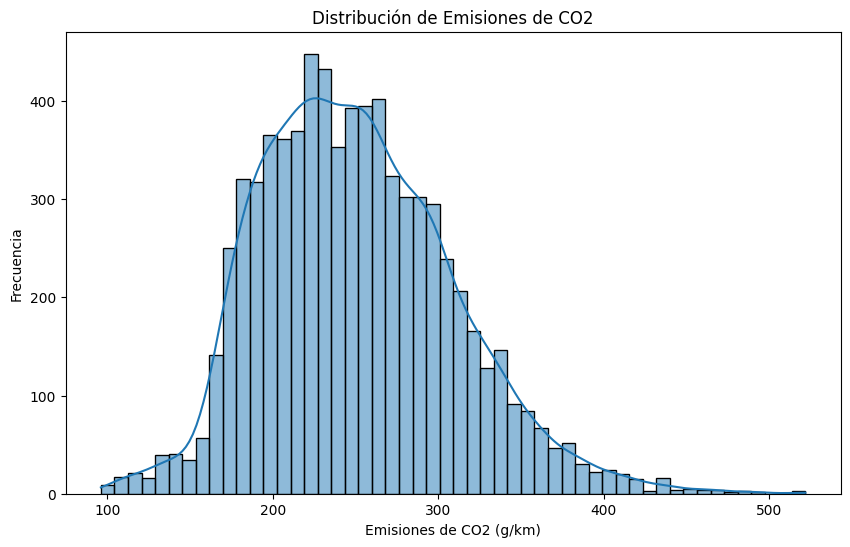

In [12]:
# Visualizar la distribución de CO2 Emissions
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True)
plt.title('Distribución de Emisiones de CO2')
plt.xlabel('Emisiones de CO2 (g/km)')
plt.ylabel('Frecuencia')
plt.show()


--- Conteo de Tipos de Combustible ---
Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64


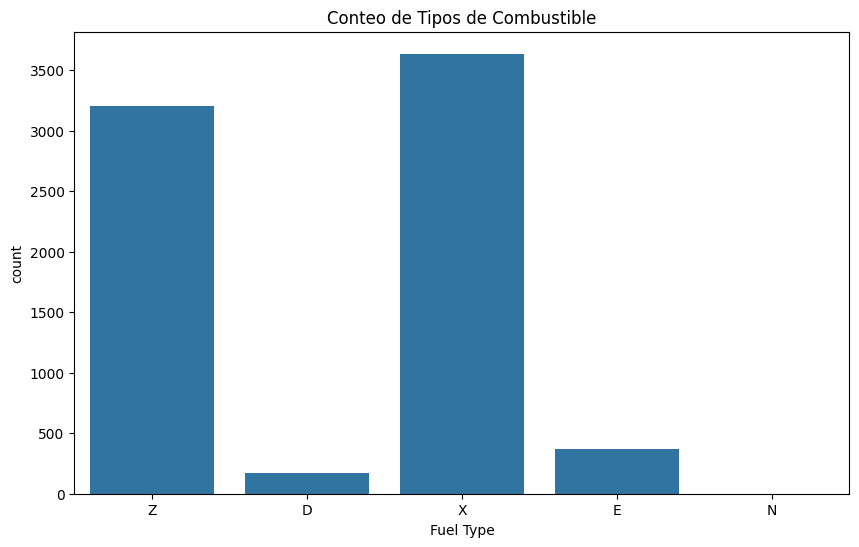

In [13]:
# Contar los valores de 'Fuel Type'
print("\n--- Conteo de Tipos de Combustible ---")
print(df['Fuel Type'].value_counts())

# Visualizar el conteo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fuel Type')
plt.title('Conteo de Tipos de Combustible')
plt.show()

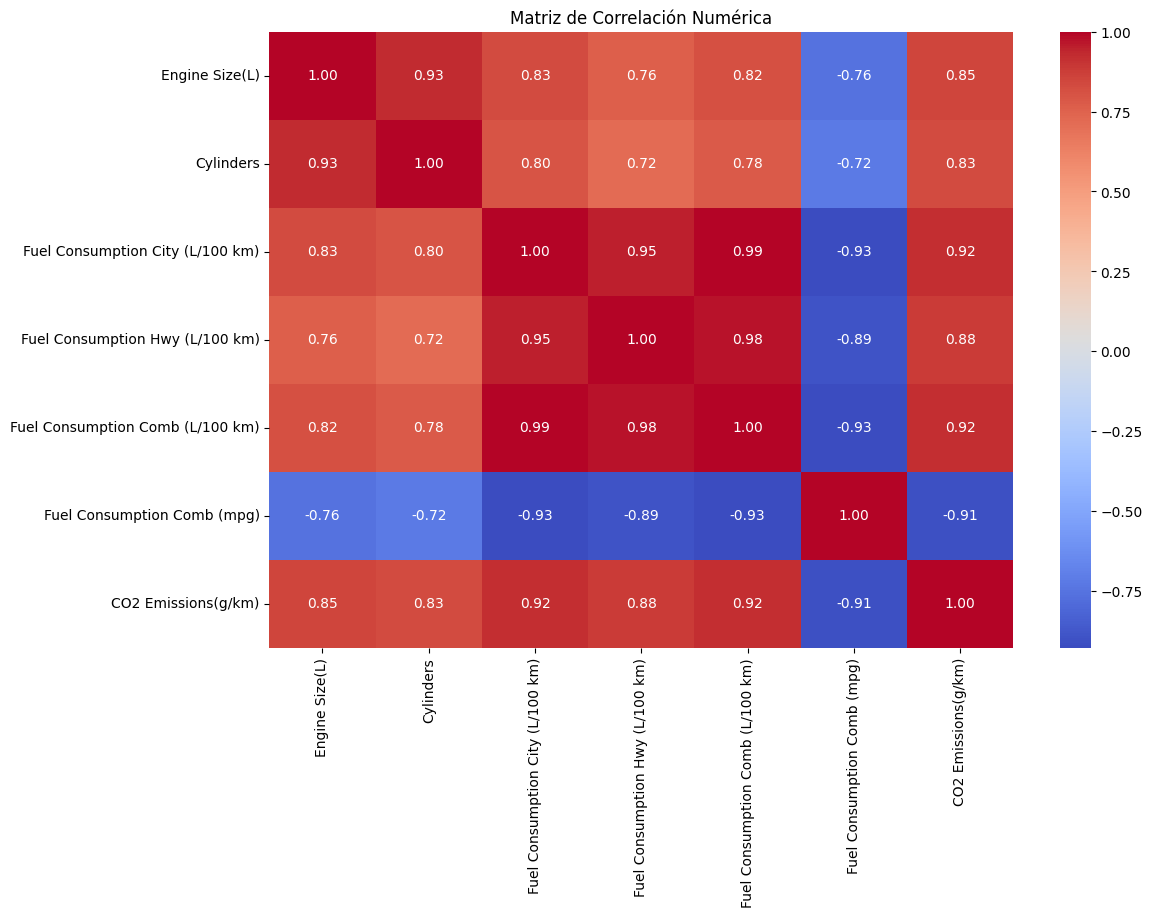

In [14]:
# Seleccionamos solo las columnas numéricas para la matriz de correlación
numeric_cols = df.select_dtypes(include=['number'])

# Matriz de Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación Numérica')
plt.show()